Question 1

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def generateData(d, N, noise=0.1):
    np.random.seed(12345)
    X = np.concatenate([np.ones([N, 1]), np.random.randn(N, d)], axis=1)
    lambdaTrue = -1 + 2 * np.tan(np.random.randn(len(X[0])))
    Y = 1 * ((X @ lambdaTrue + noise * np.random.randn(N)) > 0)
    D = X, Y
    return D

In [18]:
def split(D, train_size):
    x, y = D
    x_trainning = []
    x_testing = []
    y_traning = []
    y_testing = []
    for i in range(0, train_size):
        x_trainning.append(x[i])
        y_traning.append(y[i])
    for i in range(train_size, len(y)):
        x_testing.append(x[i])
        y_testing.append(y[i])
    return x_trainning, x_testing, y_traning, y_testing

In [19]:
def model(x, par):
    z = x @ par
    return 1 / (np.exp(-z) + 1)
    # return np.power(1 / (1 + np.power(np.e, -z)), -1)

In [20]:
def dModel(x, par):
    # f = np.power((1 + np.power(np.e, (np.dot(x, par)))), -1)
    # f = np.power(1 + np.power(np.e, -np.dot(x, par)), -1)
    # gradient = np.dot(f * (1 - f), x)
    f = model(x, par)
    return f * (1 - f) * x
    # return gradient

In [21]:
def objective(par, data):
    ell = 0
    X, Y = data
    for n in range(len(X)):
        x, y = X[n], Y[n]
        # f = np.power((np.dot(par,x)),np.e)
        f = model(x, par)
        s = -np.log(f) if y == 1 else -np.log(1 - f)
        ell = ell + s
    return ell

In [22]:
def gradient(par, data):
    grad = np.zeros(len(par))
    X, Y = data
    for n in range(len(X)):
        x, y = X[n], Y[n]
        f = model(X[n], par)

        # s = - (y - (1-y)*f) / (y * f + (1 - y) * (1 - f))
        s = -(y - f) / (y * f + (1 - y) * (1 - f))
        grad = grad + s * dModel(x, par)

    return grad

In [23]:
def train(par0, eta, T, data):
    par = par0
    obj = []
    for t in range(T):
        ell = objective(par, data)
        obj.append(ell)
        grad = gradient(par, data)
        par = par - eta * grad
    return par, obj

In [24]:
def ER(par, data):
    ER = 0
    X, Y = data
    for n in range(0, len(X)):
        x, y = X[n], Y[n]
        y_Hat = 1 if model(x, par) > 0.5 else 0
        s = 1 * (y != y_Hat)
        ER = ER + s
    return ER / len(X)

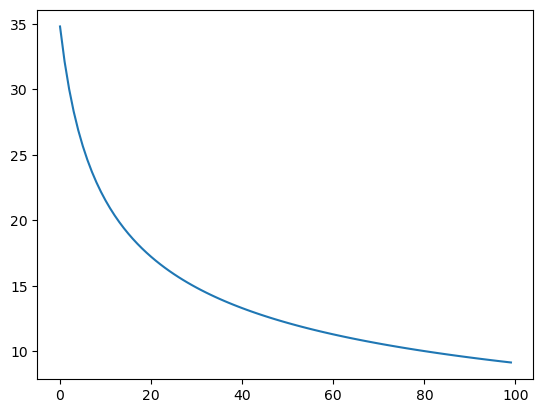

[0.2, 0.68, 0.52, 0.58, 0.66]


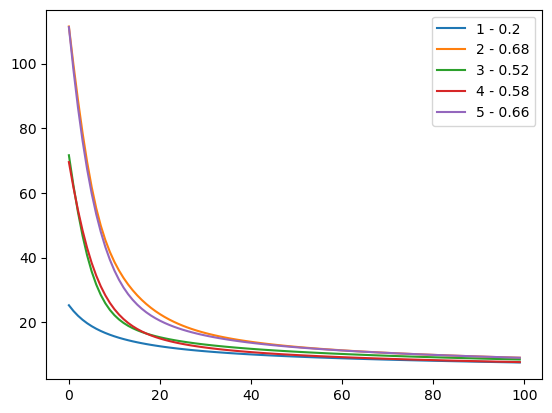

In [25]:
lambda1 = np.transpose(np.full(11, 0.01))
d = 10
N = 100
D = generateData(d, N)
x_trainning, x_testing, y_traning, y_testing = split(D, 50)
eta = 0.01
epoch = []
itterations = 100
tryInit = [np.random.randn(len(x_trainning[0])) for m in range(5)]
par, obj = train(lambda1, eta, 100, (x_trainning, y_traning))
plt.plot(obj)
plt.show()

for init in tryInit:
    par, values = train(init, eta, itterations, (x_trainning, y_traning))
    epoch.append((par, values))

ERs = []
for i in range(0, len(epoch)):
    ERs.append(ER(tryInit[i], (x_testing, y_testing)))
print(ERs)
counter = 0
for par, values in epoch:
    plt.plot(values, label=str(counter + 1) + " - " + str(ERs[counter]))
    counter = counter + 1
plt.legend()
plt.show()

Question 2

In [26]:
# def add1(array):
#     return np.hstack((np.ones((len(array[0]),1)),np.array(array[0])))

[4.5399929762484854e-05, 0.00012340980408667956, 0.00033546262790251185, 0.0009118819655545162, 0.0024787521766663585]


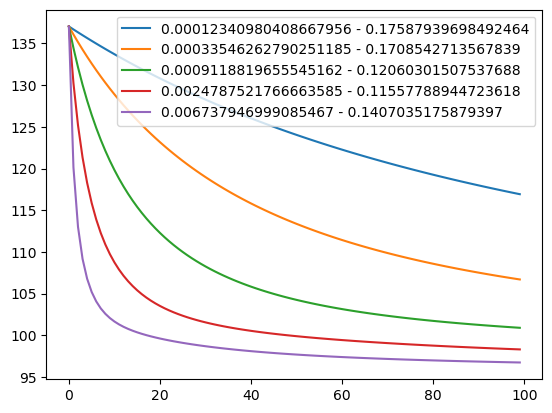

In [33]:
import pandas as pd

data = pd.read_csv("CarsDataSetForCW1.csv", sep=",")
Z = data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']].to_numpy()

# Y = 1 * (Z[:, 0] >= np.mean(Z[:, 0]))
# X, Y = Z[:, 1:], Y
# D_train = (X[:len(data) // 2], Y[:len(data) // 2])
# D_test = (X[len(data) // 2:], Y[len(data) // 2:])
# D_train_normalised = ((D_train[0] - np.average(D_train[0])) / np.std(D_train[0]), D_train[1])
# D_test_normalised = ((D_test[0] - np.average(D_train[0])) / np.std(D_train[0]), D_test[1])
# x_testing = D_test_normalised[0]
# y_testing = D_test_normalised[1]
# x_trainning = D_train_normalised[0]
# y_traning = D_train_normalised[1]
Y = 1 * (Z[:, 0] >= np.mean(Z[:, 0]))
X, Y = Z[:, 1:], Y
N_train = len(data) // 2
X_train, Y_train = X[:N_train], Y[:N_train]
X_test, Y_test = X[N_train:], Y[N_train:]

X_train_norm = (X_train - np.average(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_norm = (X_test - np.average(X_train, axis=0)) / np.std(X_train, axis=0)

etas = []
for m in range(0,5):
    etas.append(np.exp(m - 10))
lambda1 = 0.01 * np.random.randn(len(X[0]))
print(etas)
ERs = []
N = 100
counter = 1
for eta in etas:
    par, obj = train(lambda1, eta, N, (X_train_norm, Y_train))
    plt.plot(obj, label=str((np.exp(counter - 10))) + " - " + str((ER(par, (X_test_norm, Y_test)))))
    counter=counter+1
plt.legend()
plt.show()


Question 3

(397, 9)


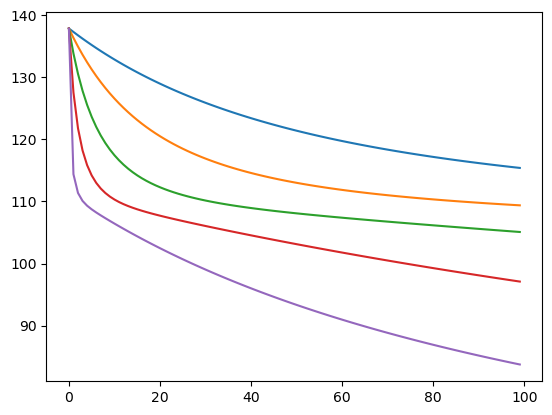

[0.6482412060301508, 0.6482412060301508, 0.6482412060301508, 0.6482412060301508, 0.5829145728643216]


In [28]:
data = pd.read_csv("CarsDataSetForCW1.csv", sep=",")
Z = data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']].to_numpy()
origin = Z[:, -1]
two_cols = []
for i in origin:
    if 1 == i:
        two_cols.append([1, 0])
    elif 2 == i:
        two_cols.append([0, 1])
    elif 3 == i:
        two_cols.append([0, 0])
two_cols = np.array(two_cols)
Z = Z[:, :-1]
Z = np.hstack((Z, two_cols))
print(Z.shape)
Y = 1 * (Z[:, 0] >= np.mean(Z[:, 0]))
X, Y = Z[:, 1:], Y
D_train = (X[:len(data) // 2], Y[:len(data) // 2])
D_test = (X[len(data) // 2:], Y[len(data) // 2:])
D_train_normalised = ((D_train[0] - np.average(D_train[0])) / np.std(D_train[0]), D_train[1])
D_test_normalised = ((D_test[0] - np.average(D_test[0])) / np.std(D_test[0]), D_test[1])
lambda1 = np.transpose(np.full(len(Z[0]) - 1, 0.01))
d = 5
ERs = []
N = 100
etas = []
epochs = np.arange(0, N)
for m in range(d):
    etas.append(np.exp(m - 10))
x_testing = D_test_normalised[0]
y_testing = D_test_normalised[1]
x_trainning = D_train_normalised[0]
y_traning = D_train_normalised[1]
for eta in etas:
    par, obj = train(lambda1, eta, N, (x_trainning, y_traning))
    ERs.append(ER(par, (x_testing, y_testing)))
    plt.plot(epochs, obj)
plt.show()
print(ERs)

In [29]:
# # origin_dummies = pd.get_dummies(data['name'])
# np.random.seed(12345)
# data = pd.read_csv("CarsDataSetForCW1.csv", sep =',' )
# 
# Z = data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']].to_numpy()
# 
# Y = 1 * (Z[:, 0]>=np.mean(Z[:,0]))
# X, Y = Z[:, 1:], Y
# N_train = len(data)//2
# X_train, Y_train = X[:N_train], Y[:N_train]
# X_test, Y_test = X[N_train:], Y[N_train:]
# 
# train_normalised = ((x_trainning[0] - np.average(x_trainning[0])) / np.std(x_trainning[0]), x_trainning[1])
# test_normalised = ((x_testing[0] - np.average(x_testing[0])) / np.std(x_testing[0]), x_testing[1])
# 
# lambda1 = 0.01*np.random.randn(len(X[0]))
# vals=[]
# iterations=100
# etas=[]
# ERs=[]
# for i in range (1,6):
#     etas.append(np.exp(i-10))
# etas=np.array(etas)
# for i in etas:
#     par, obj = train(lambda1,i,iterations,(train_normalised,y_testing))

Question 4

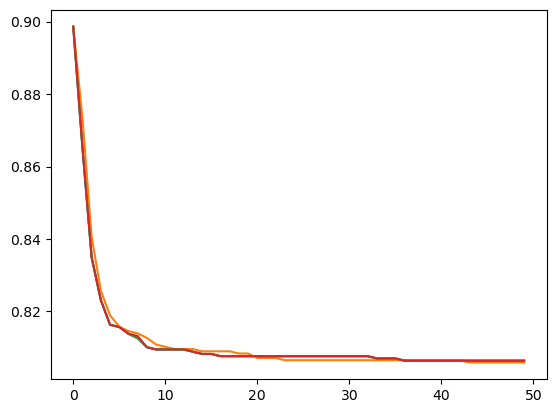

[0.8985776128633272, 0.865182436611008, 0.8348794063079777, 0.8231292517006803, 0.8163265306122449, 0.8157081014223871, 0.8138528138528138, 0.8132343846629561, 0.8101422387136673, 0.8095238095238095, 0.8095238095238095, 0.8095238095238095, 0.8095238095238095, 0.8089053803339518, 0.808286951144094, 0.808286951144094, 0.8076685219542362, 0.8076685219542362, 0.8076685219542362, 0.8076685219542362, 0.8076685219542362, 0.8076685219542362, 0.8076685219542362, 0.8076685219542362, 0.8076685219542362, 0.8076685219542362, 0.8076685219542362, 0.8076685219542362, 0.8076685219542362, 0.8076685219542362, 0.8076685219542362, 0.8076685219542362, 0.8076685219542362, 0.8070500927643784, 0.8070500927643784, 0.8070500927643784, 0.8064316635745207, 0.8064316635745207, 0.8064316635745207, 0.8064316635745207, 0.8064316635745207, 0.8064316635745207, 0.8064316635745207, 0.8064316635745207, 0.8064316635745207, 0.8064316635745207, 0.8064316635745207, 0.8064316635745207, 0.8064316635745207, 0.8064316635745207]


In [30]:

# data = pd.read_csv('DigitsDataSetForCW1.csv', sep=",")
# Z = data[['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10',
#           'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20',
#           'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30',
#           'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39', 'c40',
#           'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49', 'c50',
#           'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60',
#           'c61', 'c62', 'c63', 'c64', 'c65']].to_numpy()
dataset = pd.read_csv("DigitsDataSetForCW1.csv", sep=',').to_numpy()

[X, Y] = dataset[:, :-1], dataset[:, -1]

d01 = []
d12 = []
d23 = []
d30 = []
for i in range(len(dataset)):
    if dataset[i, -1] == 0 or dataset[i, -1] == 1:
        d01.append(dataset[i])
    if dataset[i, -1] == 1 or dataset[i, -1] == 2:
        d12.append(dataset[i])
    if dataset[i, -1] == 2 or dataset[i, -1] == 3:
        d23.append(dataset[i])
    if dataset[i, -1] == 3 or dataset[i, -1] == 0:
        d30.append(dataset[i])

d01_training = (X[:len(d01) // 2], Y[:len(d01) // 2])
d01_testing = (X[len(d01) // 2:], Y[len(d01) // 2:])
d12_training = (X[:len(d12) // 2], Y[:len(d12) // 2])
d12_testing = (X[len(d12) // 2:], Y[len(d12) // 2:])
d23_training = (X[:len(d23) // 2], Y[:len(d23) // 2])
d23_testing = (X[len(d23) // 2:], Y[len(d23) // 2:])
d30_training = (X[:len(d30) // 2], Y[:len(d30) // 2])
d30_testing = (X[len(d30) // 2:], Y[len(d30) // 2:])

d01_training_normalised = ((d01_training[0] - np.average(d01_training[0])) / np.std(d01_training[0]), d01_training[1])
d01_testing_normalised = ((d01_testing[0] - np.average(d01_testing[0])) / np.std(d01_testing[0]), d01_testing[1])
d12_training_normalised = ((d12_training[0] - np.average(d12_training[0])) / np.std(d12_training[0]), d12_training[1])
d12_testing_normalised = ((d12_testing[0] - np.average(d12_testing[0])) / np.std(d12_testing[0]), d12_testing[1])
d23_training_normalised = ((d23_training[0] - np.average(d23_training[0])) / np.std(d23_training[0]), d23_training[1])
d23_testing_normalised = ((d23_testing[0] - np.average(d23_testing[0])) / np.std(d23_testing[0]), d23_testing[1])
d30_training_normalised = ((d30_training[0] - np.average(d30_training[0])) / np.std(d30_training[0]), d30_training[1])
d30_testing_normalised = ((d30_testing[0] - np.average(d30_testing[0])) / np.std(d30_testing[0]), d30_testing[1])

lambda1 = np.transpose(np.full(64, 0.01))
d = 50
N = 0.0001
eta = 0.0001
epochs = np.arange(0, N)
itterations = 10

lambda0 = np.random.normal(0, N, 64)

d01_X_training_normalised = d01_training_normalised[0]
d01_Y_training_normalised = d01_training_normalised[1]
d12_X_training_normalised = d12_training_normalised[0]
d12_Y_training_normalised = d12_training_normalised[1]
d23_X_training_normalised = d23_training_normalised[0]
d23_Y_training_normalised = d23_training_normalised[1]
d30_X_training_normalised = d30_training_normalised[0]
d30_Y_training_normalised = d30_training_normalised[1]

# lambda_d01 = train(lambda0, eta, d, (d01_X_training_normalised, d01_Y_training_normalised))
# lambda_d12 = train(lambda0, eta, d, (d12_X_training_normalised, d12_Y_training_normalised))
# lambda_d23 = train(lambda0, eta, d, (d23_X_training_normalised, d23_Y_training_normalised))
# lambda_d30 = train(lambda0, eta, d, (d30_X_training_normalised, d30_Y_training_normalised))

d01_X_training_normalised = d01_training_normalised[0]
d01_Y_training_normalised = d01_training_normalised[1]
d01_X_testing_normalised = d01_testing_normalised[0]
d01_Y_testing_normalised = d01_testing_normalised[1]
d12_X_training_normalised = d12_training_normalised[0]
d12_Y_training_normalised = d12_training_normalised[1]
d12_X_testing_normalised = d12_testing_normalised[0]
d12_Y_testing_normalised = d12_testing_normalised[1]
d23_X_training_normalised = d23_training_normalised[0]
d23_Y_training_normalised = d23_training_normalised[1]
d23_X_testing_normalised = d23_testing_normalised[0]
d23_Y_testing_normalised = d23_testing_normalised[1]
d30_X_training_normalised = d30_training_normalised[0]
d30_Y_training_normalised = d30_training_normalised[1]
d30_X_testing_normalised = d30_testing_normalised[0]
d30_Y_testing_normalised = d30_testing_normalised[1]

lambda0 = 0.0001 * np.random.randn(64)
d = 5
ERs = []
objs = []
N = 50
eta = 0.0001

lambda0 = np.random.normal(0, eta, d01_X_training_normalised.shape[1])
for i in range(0, N):
    par, obj = train(lambda0, eta, N, (d01_X_training_normalised, d01_Y_training_normalised))
    objs.append(obj)
    ERs.append(ER(par, (d01_X_testing_normalised, d01_Y_testing_normalised)))
    lambda0 = par
plt.plot(range(N), ERs)
ERs = []
objs = []
lambda0 = 0.0001 * np.random.randn(64)
lambda0 = 0.0001 * np.random.randn(64)
for i in range(0, N):
    par, obj = train(lambda0, eta, N, (d12_X_training_normalised, d12_Y_training_normalised))
    objs.append(obj)
    ERs.append(ER(par, (d12_X_testing_normalised, d12_Y_testing_normalised)))
    lambda0 = par
plt.plot(range(N), ERs)
ERs = []
objs = []
lambda0 = 0.0001 * np.random.randn(64)
lambda0 = np.random.normal(0, eta, d23_X_training_normalised.shape[1])
for i in range(0, N):
    par, obj = train(lambda0, eta, N, (d23_X_training_normalised, d23_Y_training_normalised))
    objs.append(obj)
    ERs.append(ER(par, (d23_X_testing_normalised, d23_Y_testing_normalised)))
    lambda0 = par
plt.plot(range(N), ERs)
ERs = []
objs = []
lambda0 = 0.0001 * np.random.randn(64)
lambda0 = np.random.normal(0, eta, d30_X_training_normalised.shape[1])
for i in range(0, N):
    par, obj = train(lambda0, eta, N, (d30_X_training_normalised, d30_Y_training_normalised))
    objs.append(obj)
    ERs.append(ER(par, (d30_X_testing_normalised, d30_Y_testing_normalised)))
    lambda0 = par
plt.plot(range(N), ERs)
ax = plt.gca()

plt.show()
print(ERs)

# 
# 
# ERs = []
# tryInit = [np.random.randn(64) for m in range(50)]
# for i in tryInit:
#     temp = []
#     temp.append(ER(i, (d01_X_testing_normalised, d01_Y_testing_normalised)))
# ERs.append(temp)
# tryInit = [np.random.randn(64) for m in range(50)]
# for i in tryInit:
#     temp = []
#     temp.append(ER(i, (d12_X_testing_normalised, d12_Y_testing_normalised)))
# ERs.append(temp)
# tryInit = [np.random.randn(64) for m in range(50)]
# for i in tryInit:
#     temp = []
#     temp.append(ER(i, (d23_X_testing_normalised, d23_Y_testing_normalised)))
# ERs.append(temp)
# tryInit = [np.random.randn(64) for m in range(50)]
# for i in tryInit:
#     temp = []
#     temp.append(ER(i, (d23_X_testing_normalised, d23_Y_testing_normalised)))
# ERs.append(temp)
# print(ERs)
# 
# plt.plot(epochs,lambda_d01[1])
# plt.plot(epochs,lambda_d12[1])
# plt.plot(epochs,lambda_d23[1])
# plt.plot(epochs,lambda_d30[1])
# for k in range(0, 10):
#     image_matrix = np.reshape(X[k], (8, 8))
#     plt.matshow(image_matrix)